In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# De scikit-learn...

# Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

# Estandarización y modelado
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_selector
# Division de los datos
from sklearn.model_selection import train_test_split

# Normalización
from sklearn.preprocessing import MinMaxScaler

# Regresiones
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV

# ML metricas
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= '/content/drive/MyDrive/weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

# Exploratorio


In [190]:
### Vista de datos
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [191]:
### Columnas
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [192]:
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [193]:
### Cantidad de valores faltantes.
df.isna().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

In [194]:
### Busco duplicados
if not df.duplicated().any():
  print('No hay registros duplicados')

No hay registros duplicados


# Análisis descriptivo - Exploratorio

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [196]:
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


# Correlación


In [209]:
num_col = df.select_dtypes(include=['float64'])

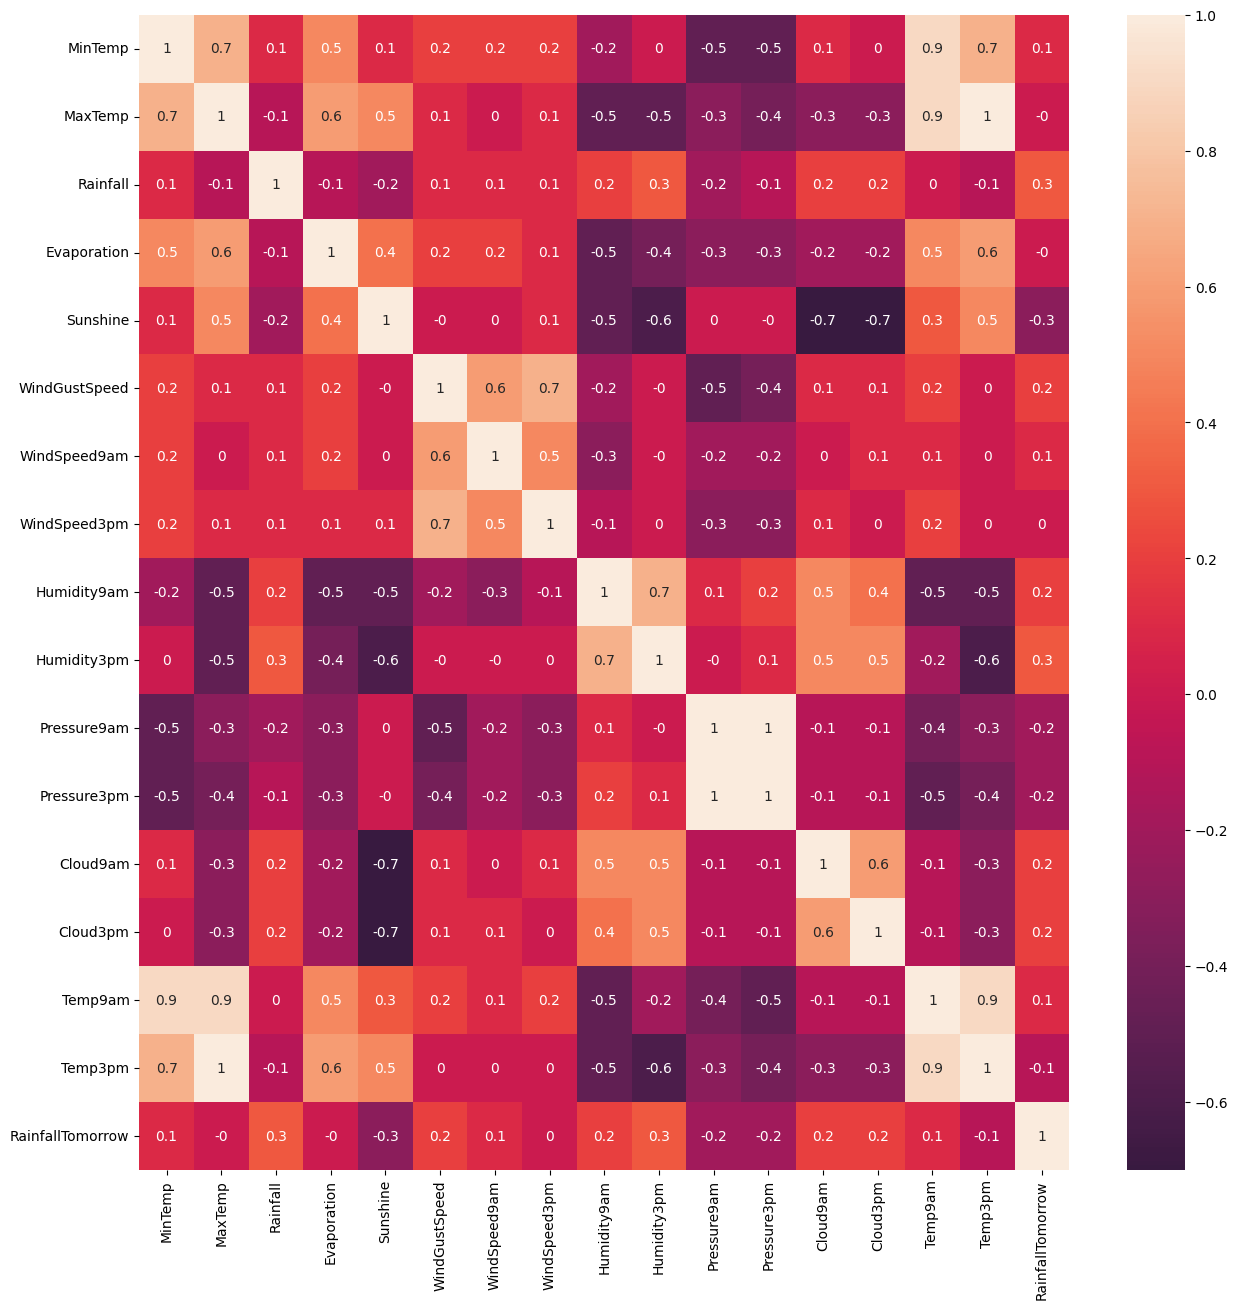

In [210]:
corr = num_col.corr().round(1)
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

<Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


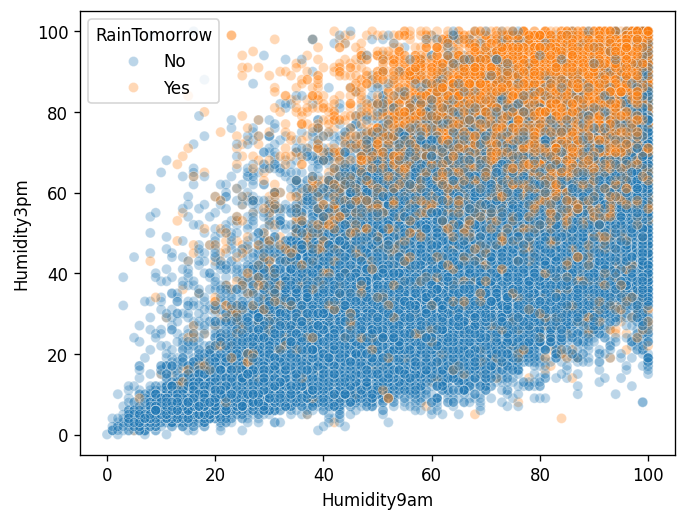

In [215]:
### scatter_plots entre variables que tienen una alta correlación
### Humedad
num_col['RainTomorrow'] = df['RainTomorrow']
plt.figure(dpi=120)
sns.scatterplot(num_col, x='Humidity9am', y='Humidity3pm', hue='RainTomorrow', alpha=0.3)

Segun el gráfico, se observa si ambos valores de humedad son altos, entonces hay grandes chances de lluvia

<Axes: xlabel='Pressure9am', ylabel='Pressure3pm'>

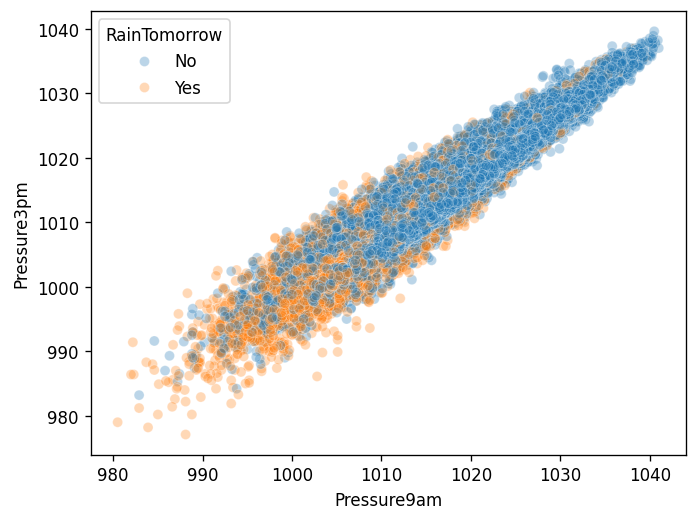

In [216]:
### Presión
plt.figure(dpi=120)
sns.scatterplot(num_col, x='Pressure9am', y='Pressure3pm', hue='RainTomorrow', alpha=0.3)

Segun el gráfico, si la presión de las 9am es baja al igual que la de las 3pm entonces hay grandes chances de lluvia

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

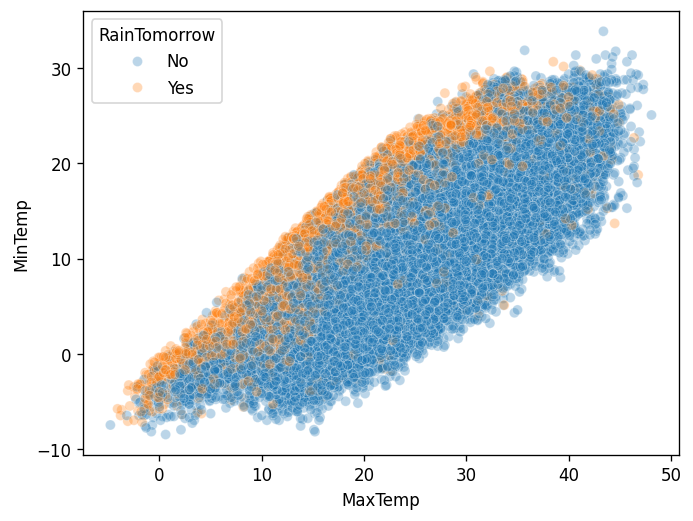

In [217]:
### Temperatura
plt.figure(dpi=120)
sns.scatterplot(num_col, x='MaxTemp', y='MinTemp', hue='RainTomorrow', alpha=0.3)

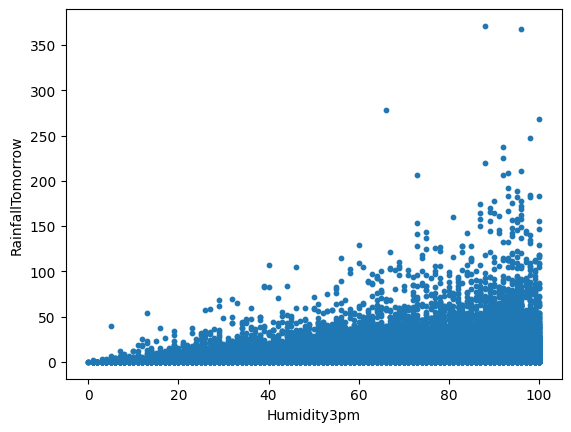

<Figure size 300x200 with 0 Axes>

In [218]:
# Relación entre la Humedad a las 3pm y la cantidad de lluvia de mañana
f ,ax = plt.subplots()
plt.figure(figsize=(3, 2))
ax.scatter(num_col['Humidity3pm'], num_col['RainfallTomorrow'], s= 10)
ax.set_xlabel('Humidity3pm')
ax.set_ylabel('RainfallTomorrow')
plt.show()

Segun el gráfico, se observa una tendencia de que a mayor humedad de las 3pm mayor cantidad de lluvia

<Axes: xlabel='RainfallTomorrow', ylabel='Density'>

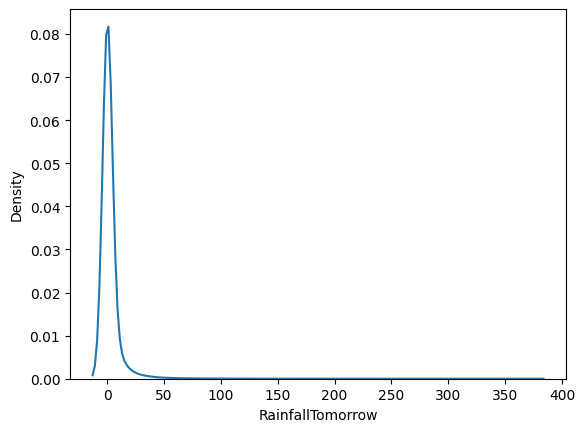

In [221]:
# Distribución de RainfallTomorrow
sns.kdeplot(num_col['RainfallTomorrow'], bw_method=0.5)

Segun el gráfico, se observan gran cantidad de outliers


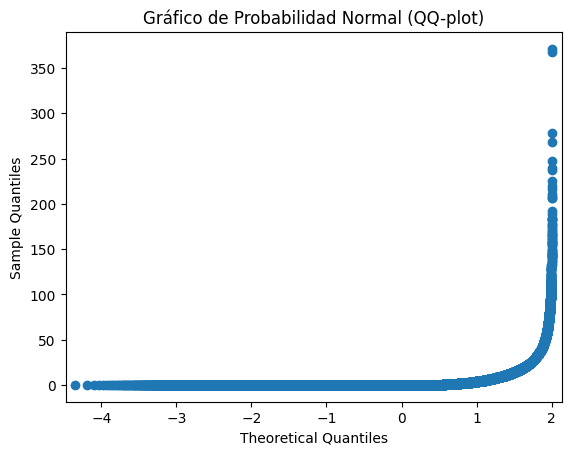

In [227]:
#  QQ-plot
sm.qqplot((num_col['RainfallTomorrow']))
plt.title("Gráfico de Probabilidad Normal (QQ-plot)")
plt.show()

La distribución de la variable a predecir no presenta normalidad

# Preprocesado

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

## Pipeline

* Descartar Unnamed y Date feature: **ColDropper**
* Descartar todas las location que no son necesarias: **LocDropper**
* Dropear nulos y Label Encoding para las variables yes/no: **BoolYNDropperEncoder**
* Imputar valores nulos en variables categoricas con la moda: **CatFiller**
* Imputar valores nulos en variables numericas con la media:  **NumFiller**
* One Hot Encoding para las location: **LocEncoder**
* Encoding en sin y cos para WinDir: **CoordRecat**


In [7]:
class ColDropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
        return self

  def transform(self, X):
    return X.drop(['Unnamed: 0', 'Date'], axis=1)

In [8]:
class LocDropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
        return self

  def transform(self, X):
    aus_loc = [' Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport' ]
    return X[X['Location'].isin(aus_loc)]

In [9]:
class BoolYNDropperEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
      X.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
      X['RainTomorrow'] = X['RainTomorrow'].map({'No': 0, 'Yes': 1}).astype(float)
      X['RainToday'] = X['RainToday'].map({'No': 0, 'Yes': 1}).astype(float)

      return X


In [10]:
class CatFiller(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
      X['WindGustDir'] = X.groupby('Location')['WindGustDir'].transform(lambda x: x.fillna(x.mode()[0]))
      X['WindDir9am'] = X.groupby('Location')['WindDir9am'].transform(lambda x: x.fillna(x.mode()[0]))
      X['WindDir3pm'] = X.groupby('Location')['WindDir3pm'].transform(lambda x: x.fillna(x.mode()[0]))

      return X


In [11]:
class NumFiller(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
      remanining_vnul_columns = X.columns[X.isna().any()].tolist()
      for col in remanining_vnul_columns:
        X[col] =  X[col].fillna(X[col].mean())

      return X



In [12]:
#The following variables were eliminated: the variables WindGustDir, WindDir9am and WindDir3pm (each is split into two variables containing the cosines and sines of the wind direction angles).
#These variables can take 16 different directions, so that, in order to convert these values to real numbers, it must be taken into account that it presents a circular distribution. That is why each of the variables was split into two, one with the sine and the other with the cosine of the angle: WindGustDir_Sin, WindGustDir_Cos, WindDir9am_Sin, WindDir9am_Cos, WindDir3pm_Sin, and WindDir3pm_Cos.

class CoordRecat(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        coord = {
            'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
            'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
            'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
            'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5,
        }

        # Aplicar la recategorización
        for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
            X[col] = X[col].map(coord)
            X[f'{col}_rad'] = np.deg2rad(X[col])
            X[f'{col}_sin'] = np.sin(X[f'{col}_rad']).round(5)
            X[f'{col}_cos'] = np.cos(X[f'{col}_rad']).round(5)

        # Eliminar columnas originales y columnas radianes
        columns_to_drop = [f'{col}_rad' for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']] + ['WindGustDir', 'WindDir9am', 'WindDir3pm']
        X = X.drop(columns=columns_to_drop, axis=1)

        return X

In [13]:
class LocEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
      dummies = pd.get_dummies(X['Location'], dtype=int)
      X = pd.concat([X, dummies], axis=1)
      X.drop('Location', axis=1, inplace=True)

      return X



In [14]:
class ResetIndex(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.reset_index(drop=True)

In [15]:
# Añadido de columnas excluídas del estandarizado - para el modelo de clasificación si incorporar las locaciones

class Standarizer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
      return self
  def transform(self, X):
    # Exclusión de variables booleanas y RainfallTmorrow porque no serán estandarizaradas
    exc_c = ['RainfallTomorrow','RainToday','RainTomorrow']#,'Canberra','Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport']

    # Estandarización
    df_sub = X[[col for col in X.columns if col not in exc_c]]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_sub)

    X_scaled = pd.DataFrame(X_scaled, columns=df_sub.columns)
    for col in exc_c:
      X_scaled[f'{col}'] = X[col]

    # Nuevo DataFrame estandarizado con los nombres de las columnas originales
    return X_scaled

In [16]:
class OutliersTreater(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
      return self
  def transform(self, X):
    cols_with_ouliers=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']

    for col in cols_with_ouliers:
      IQR=X[col].quantile(0.75)-X[col].quantile(0.25)
      lower_bridge=X[col].quantile(0.25)-(IQR*1.5)
      upper_bridge=X[col].quantile(0.75)+(IQR*1.5)

      X.loc[X[col]>=round(upper_bridge,2),col]=round(upper_bridge,2)
      X.loc[X[col]<=round(lower_bridge,2),col]=round(lower_bridge,2)

    return X


In [55]:
preprocessor = Pipeline([
     ('drop_not_needed_features', ColDropper()),
     ('drop_nor_needed_locations',LocDropper()),
     ('yes_no_dropper_encoder', BoolYNDropperEncoder()),
     ('fill_null_cat', CatFiller()),
     ('fill_num_cat', NumFiller()),
     ('encode_loc', LocEncoder()),
     ('encode_wind_dir', CoordRecat()),
     ('reset_index',ResetIndex()),
     ('treat_outliers',OutliersTreater()),
     ('standariza_values', Standarizer())

])

std_df = preprocessor.fit_transform(df)
std_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,SydneyAirport,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos,RainfallTomorrow,RainToday,RainTomorrow
0,1.180091,2.032603,-0.623075,2.552082,1.605642,0.438470,-1.074368,-0.052910,-2.612639,-1.922473,...,-0.37819,-0.325922,-1.222914,1.661341,0.324618,-0.944050,-0.876042,0.0,0.0,0.0
1,1.266625,1.078205,-0.623075,2.552082,1.811428,-0.392613,0.407379,-0.165080,-2.223814,-2.173996,...,-0.37819,0.262994,-1.325721,0.821513,-1.449135,0.696932,-1.168551,0.0,0.0,0.0
2,0.764726,1.865962,-0.623075,2.552082,1.899622,-0.921485,0.026464,-1.511111,-0.003510,-2.224300,...,-0.37819,1.351184,-0.930145,1.324960,0.765056,0.120701,1.427537,0.0,0.0,0.0
3,1.439694,2.396184,-0.623075,2.164883,1.105876,0.287364,1.661164,-0.613757,-1.557255,-1.469733,...,-0.37819,0.851910,1.272665,0.821513,1.059338,-0.455530,1.324820,0.0,0.0,0.0
4,1.872365,2.517377,-0.623075,2.376082,1.576244,-0.845932,-1.074368,-1.623280,-1.834988,-1.469733,...,-0.37819,-1.158789,0.541722,-1.205993,0.324618,-1.270457,-0.438255,0.0,0.0,0.0


# Graficos con los datos preprocesados

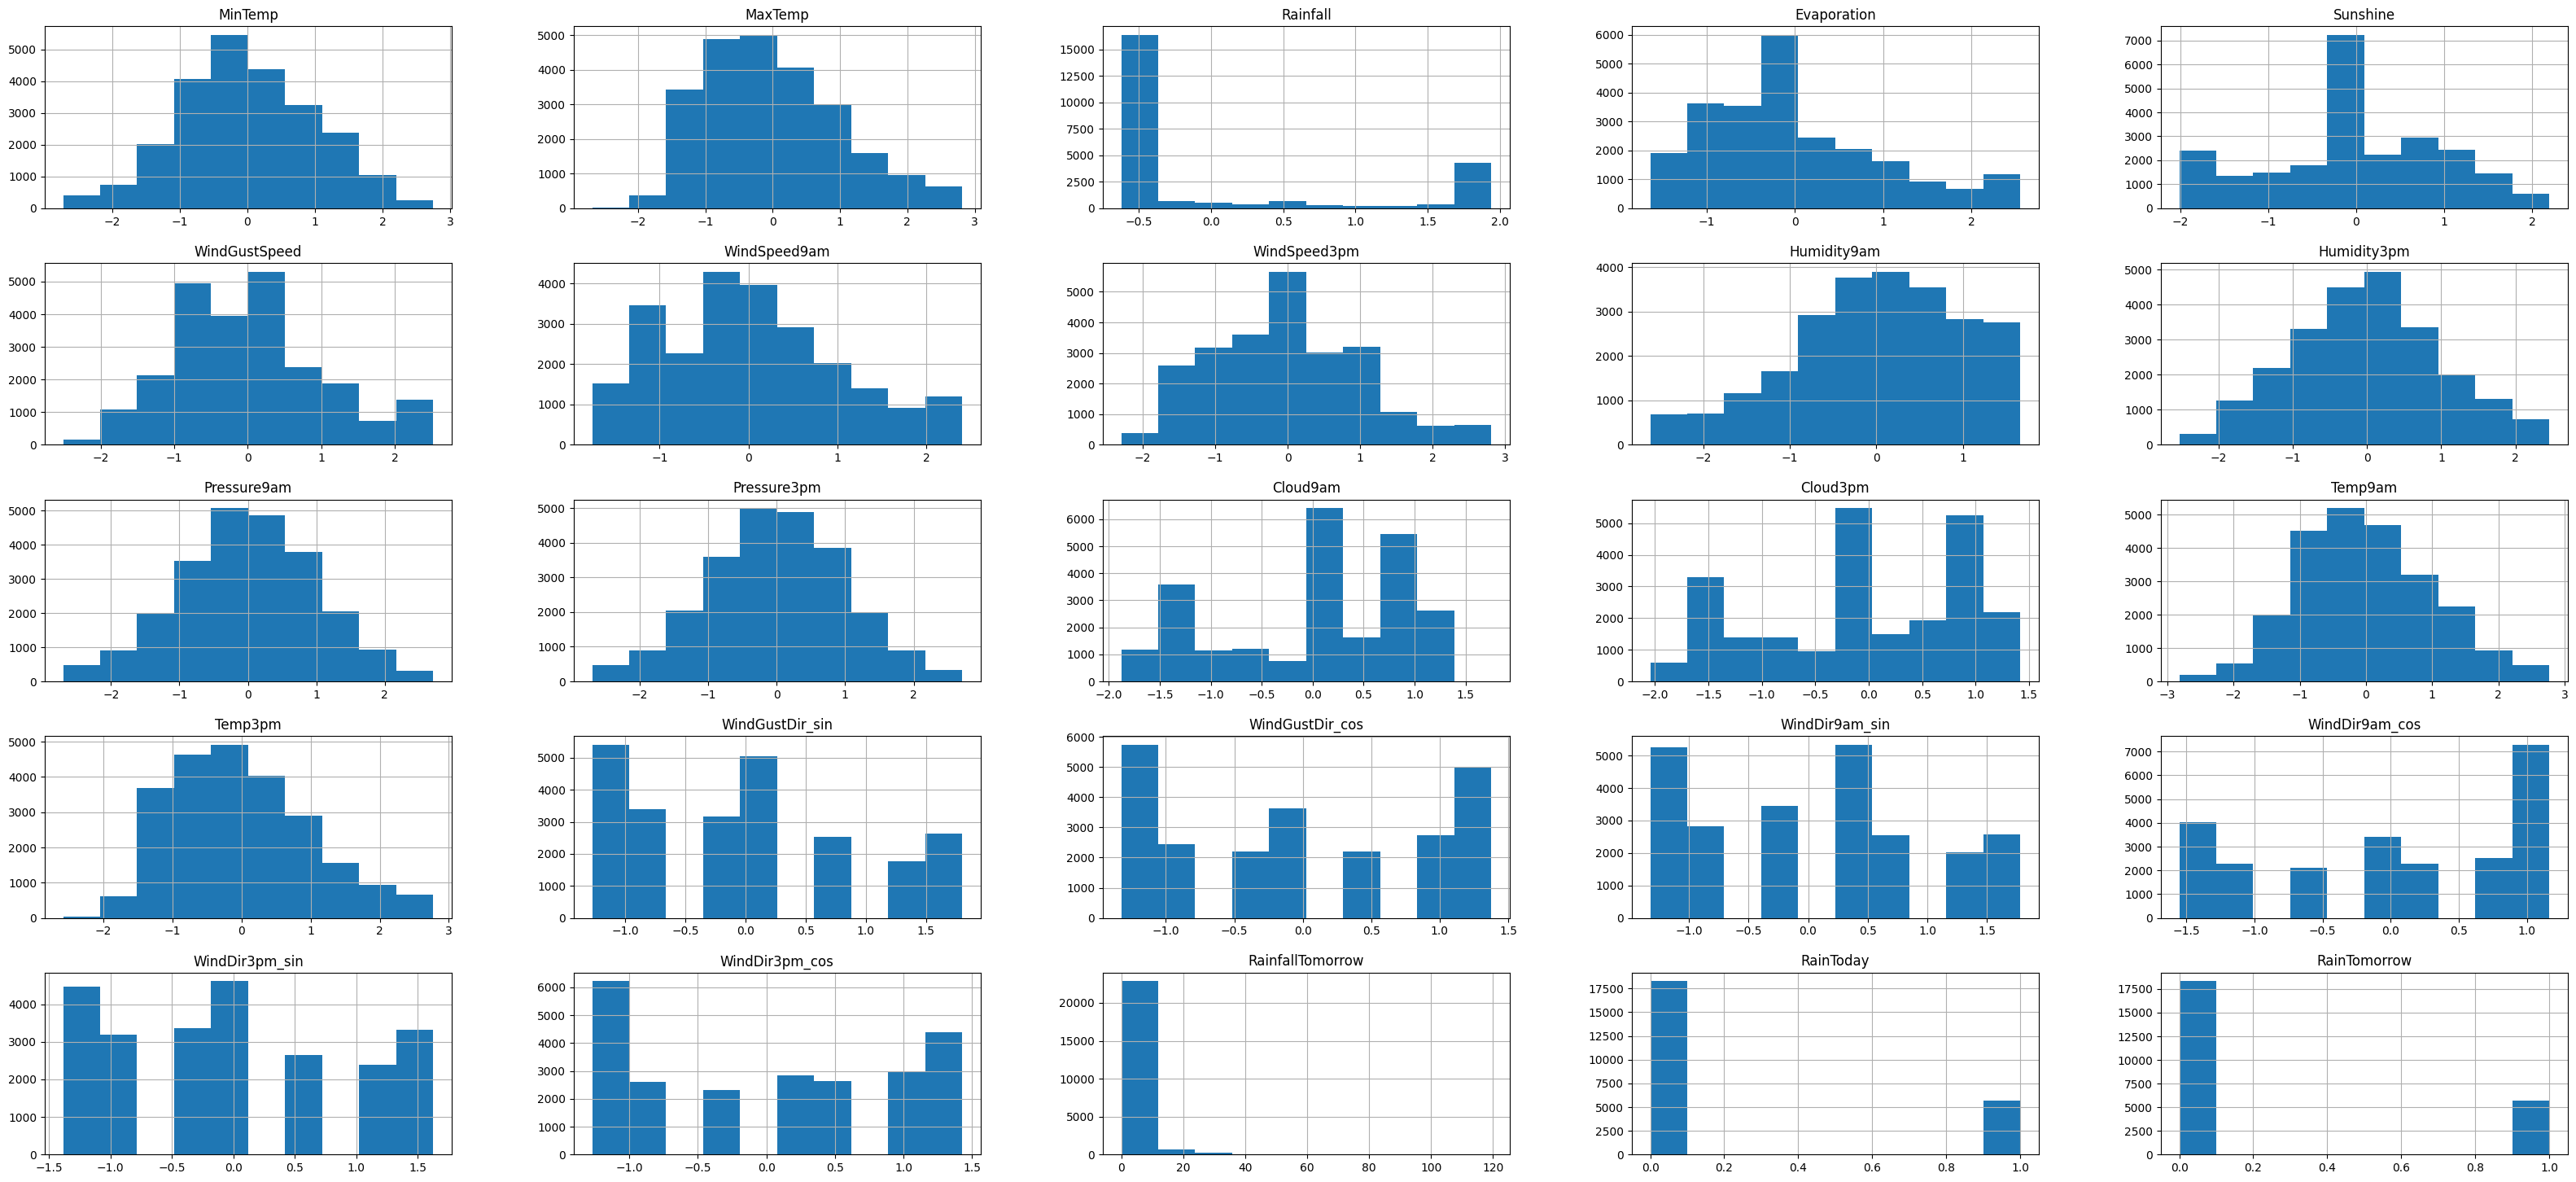

In [842]:
std_df.hist(figsize=(40,18))
plt.show()

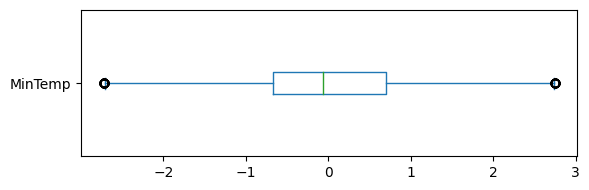

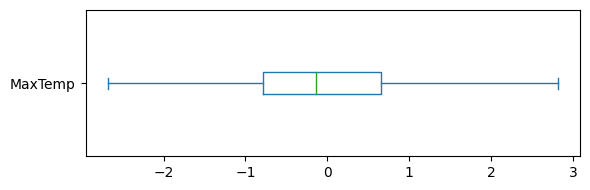

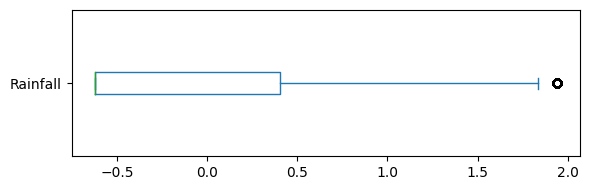

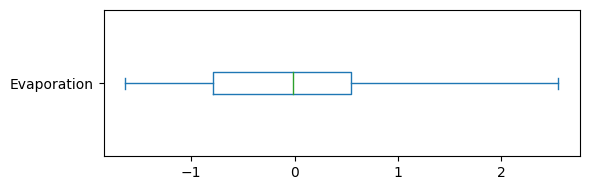

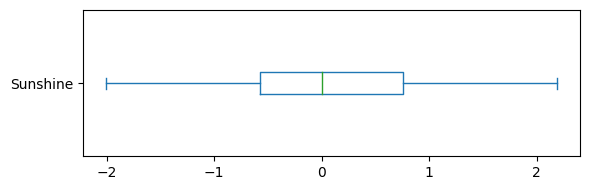

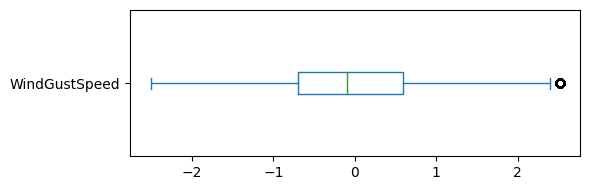

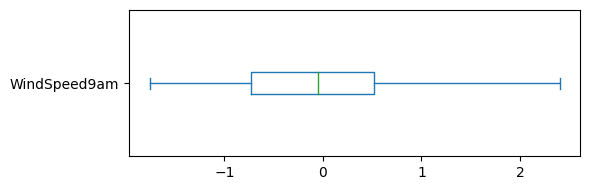

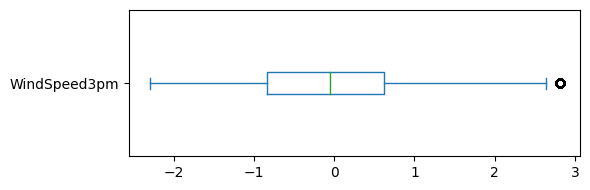

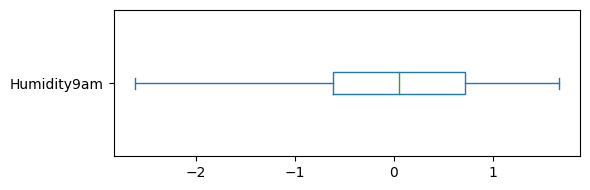

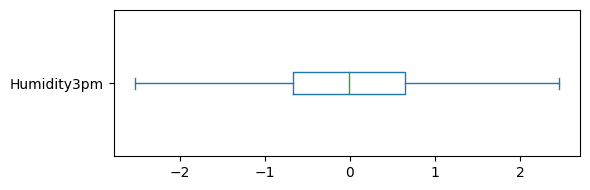

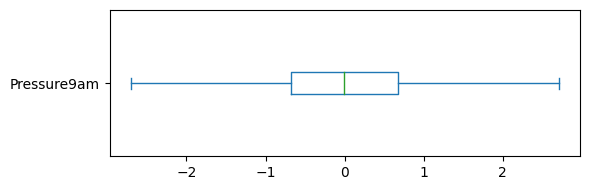

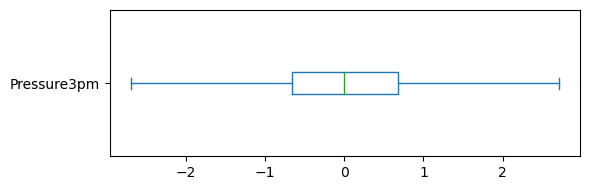

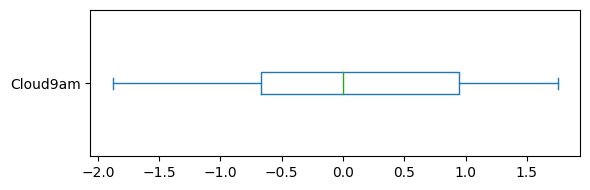

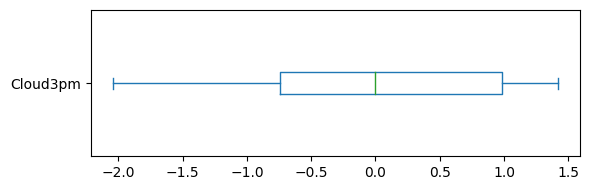

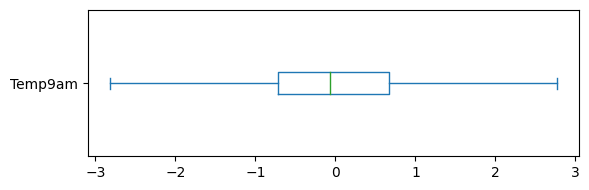

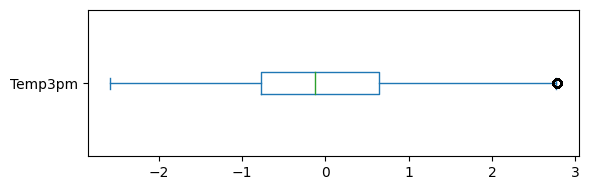

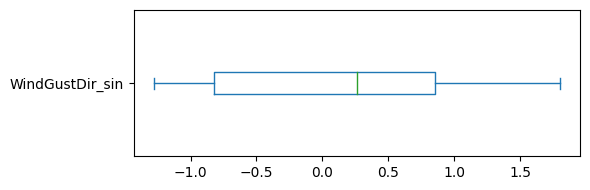

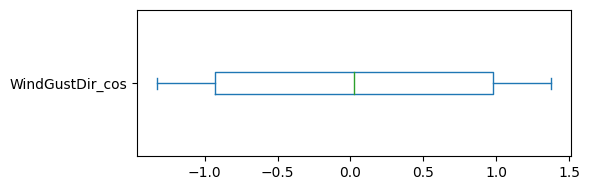

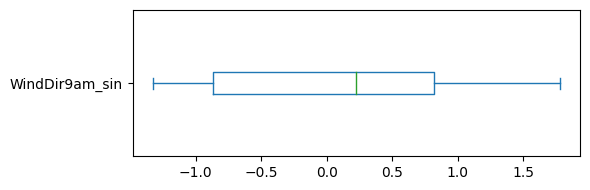

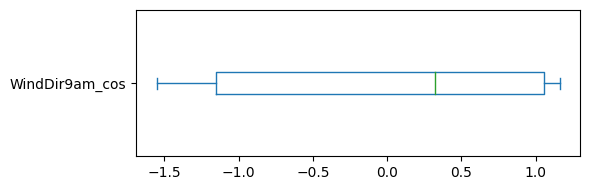

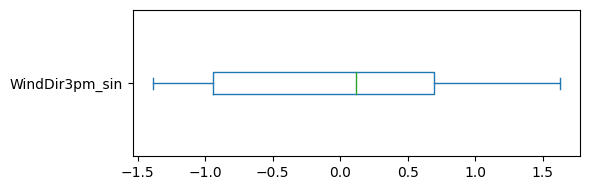

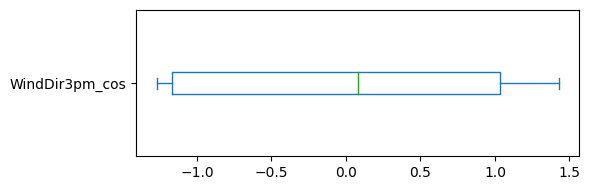

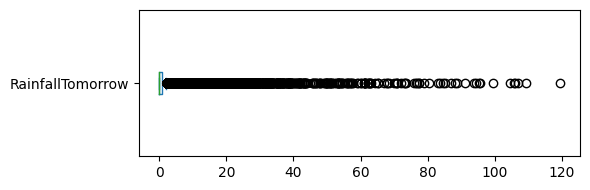

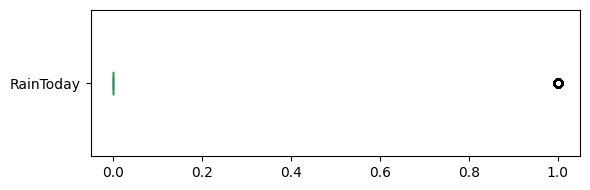

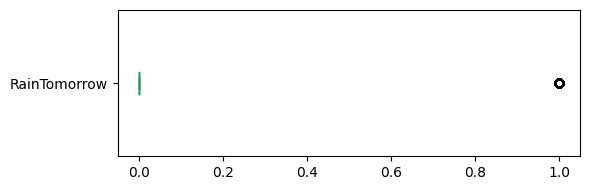

In [18]:
### Boxplt de atributos numericos
locs = ['Canberra','Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport']
num_cols = std_df.select_dtypes(include=['float64']).columns.tolist()
for col in num_cols:
  if col in locs: #descartar las columnas de loc
      continue
  plt.figure(figsize=(6, 2))
  std_df[col].plot(kind='box', vert=False)
  plt.tight_layout()
  plt.show()


# Train test split - Regresión

In [63]:
# Separación de variables explicativas y variables objetivo
X = std_df.drop(['RainfallTomorrow'], axis=1).copy()
y = std_df[['RainfallTomorrow']].copy()
# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19180, 32), (4795, 32), (19180, 1), (4795, 1))

In [65]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
       RainfallTomorrow
count       19180.00000
mean            2.08123
std             6.57857
min             0.00000
25%             0.00000
50%             0.00000
75%             0.80000
max           109.40000


In [66]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
       RainfallTomorrow
count       4795.000000
mean           2.055391
std            6.299656
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max          119.400000


In [68]:
# Crear un nuevo DataFrame para TRAIN y para TEST
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['RainfallTomorrow'] = y['RainfallTomorrow']

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['RainfallTomorrow'] = y['RainfallTomorrow']

# Regresiones



"RainfallTomorrow" --> varibale continua a predecir.

## Regresion Lineal

In [69]:
## Con todas las features

# Modelo de regresión lineal
linear_model = LinearRegression()
# Entrenamiento del modelo
linear_model.fit(X_train, y_train)
# Predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

In [70]:
# Métricas del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R^2): {r2:.2f}\n')

Error cuadrático medio (MSE): 25.84
Coeficiente de determinación (R^2): 0.35



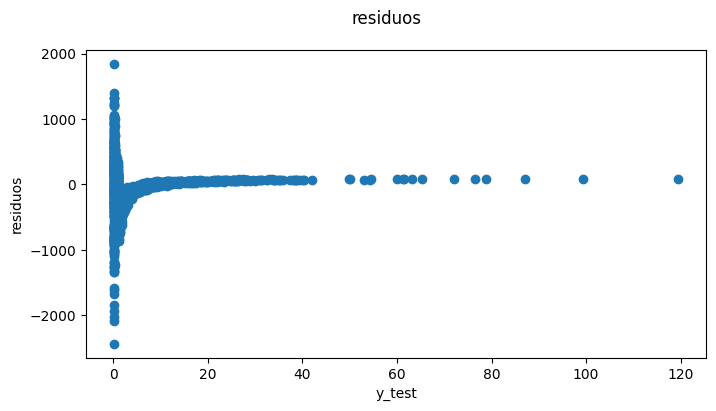

In [71]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,100*(y_test-y_pred)/y_test)
plt.show()

 El patrón nos sugiere que la función de regresión no es lineal, hay sesgo.

In [72]:
# Características (X) y la variable objetivo (y)
X_train = std_df['Humidity3pm'].values.reshape(-1, 1)
y_train = std_df['RainfallTomorrow'].values

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test[['Humidity3pm']].values.reshape(-1, 1)
y_test = df_test['RainfallTomorrow'].values

# Modelo de regresión lineal
linear_model = LinearRegression()
# Entrenamiento del modelo
linear_model.fit(X_train, y_train)
# Predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Métricas del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R^2): {r2:.2f}\n')

Error cuadrático medio (MSE): 35.79
Coeficiente de determinación (R^2): 0.10



# Regresión lineal con gradiente descendiente

In [75]:
X = df_train.drop(['RainfallTomorrow'], axis=1)

Y_SGDR = df_train['RainfallTomorrow']#.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y_SGDR,
                                             test_size=0.2,
                                             random_state=2,
                                             shuffle = True
                                             )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15344, 32), (3836, 32), (15344,), (3836,))

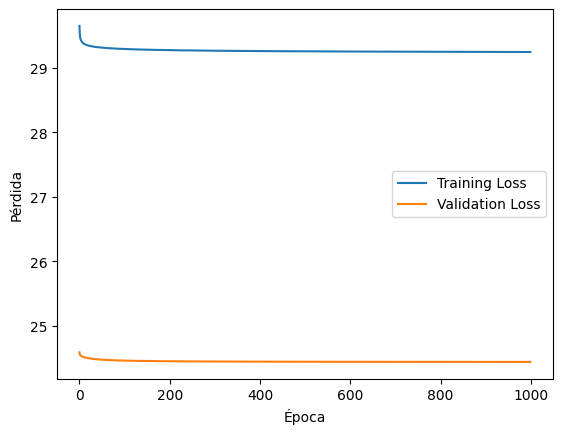

Resultados con Gradiente Descendiente:
Error cuadrático medio (MSE): 24.44
Coeficiente de determinación (R^2): 0.34


In [77]:
# Creación del modelo
model_sgd = SGDRegressor(max_iter=10000, random_state=42)

# Listas para almacenar las pérdidas
training_losses = []
validation_losses = []

# Ciclo de entrenamiento
for epoch in range(1000):  # Ajusta según el número real de épocas
    # train
    model_sgd.partial_fit(X_train, y_train)
    y_train_pred = model_sgd.predict(X_train)
    training_loss = mean_squared_error(y_train, y_train_pred)
    training_losses.append(training_loss)

    # Validación
    y_val_pred = model_sgd.predict(X_test)
    validation_loss = mean_squared_error(y_test, y_val_pred)
    validation_losses.append(validation_loss)

# Graficar las pérdidas
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


# Predicciones en el conjunto de prueba (Test)
y_pred_sgd = model_sgd.predict(X_test)

# Métricas del modelo
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

# Outputs
print('Resultados con Gradiente Descendiente:')
print(f'Error cuadrático medio (MSE): {mse_sgd:.2f}')
print(f'Coeficiente de determinación (R^2): {r2_sgd:.2f}')

Hay mejoras con respecto a la Regresión Lineal simple

## Lasso


In [83]:
modelo = make_pipeline(StandardScaler(),
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train, y_train)

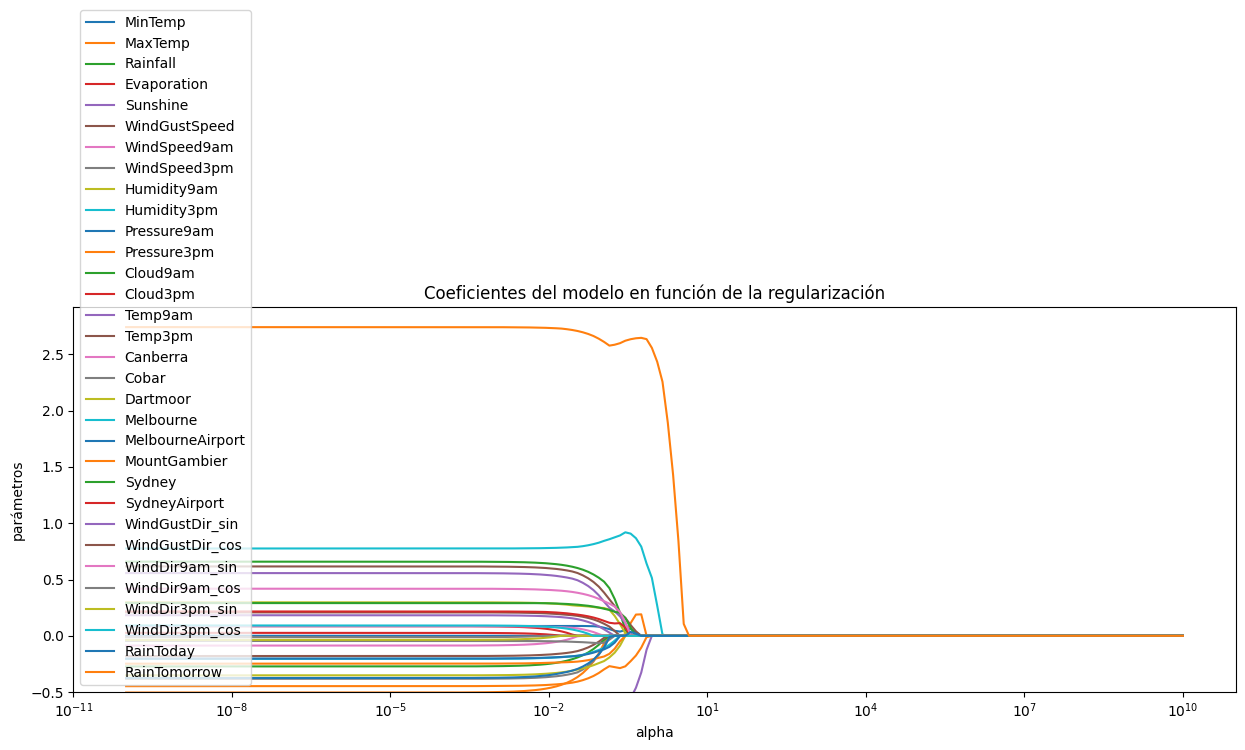

In [84]:
# Evolución de los parámetros en función de alpha
alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha, tol=1))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

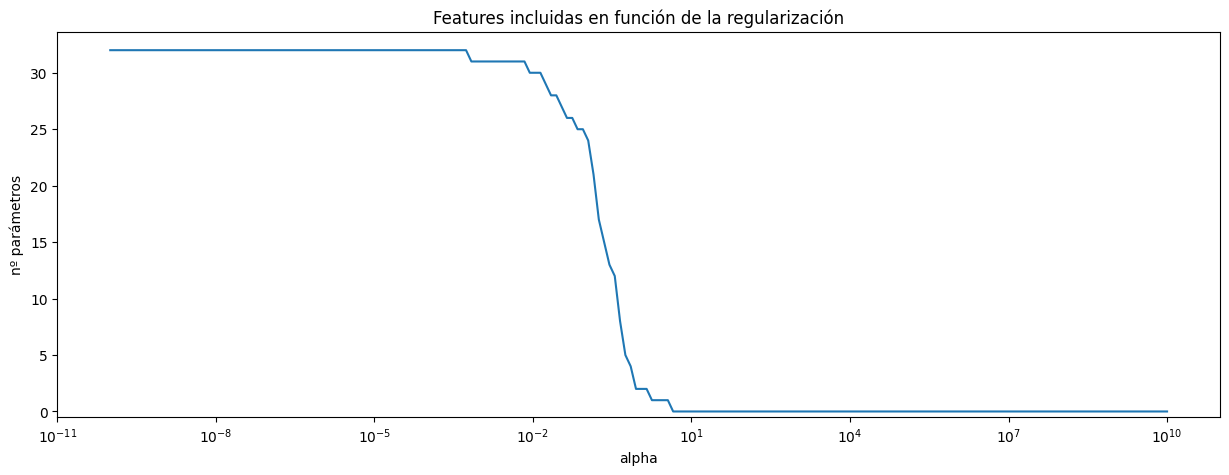

In [85]:

n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha, tol=1))
    modelo_aux.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

In [93]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

AttributeError: 'RidgeCV' object has no attribute 'mse_path_'

In [780]:
# Mejor valor alpha encontrado
print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 0.00010718913192051286


In [782]:
# Error de test del modelo
rmse_lasso = mean_squared_error(y_test,y_pred,squared = False)
R2 = metrics.r2_score(y_test, y_pred)

print("")
print(f"El error (rmse) de test es: {rmse_lasso}")
print(f"El error (R) de test es: {R2}")


El error (rmse) de test es: 5.814064278418591
El error (R) de test es: 0.211834482819506


## Ridge


In [87]:
modelo = make_pipeline(StandardScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train, y_train)

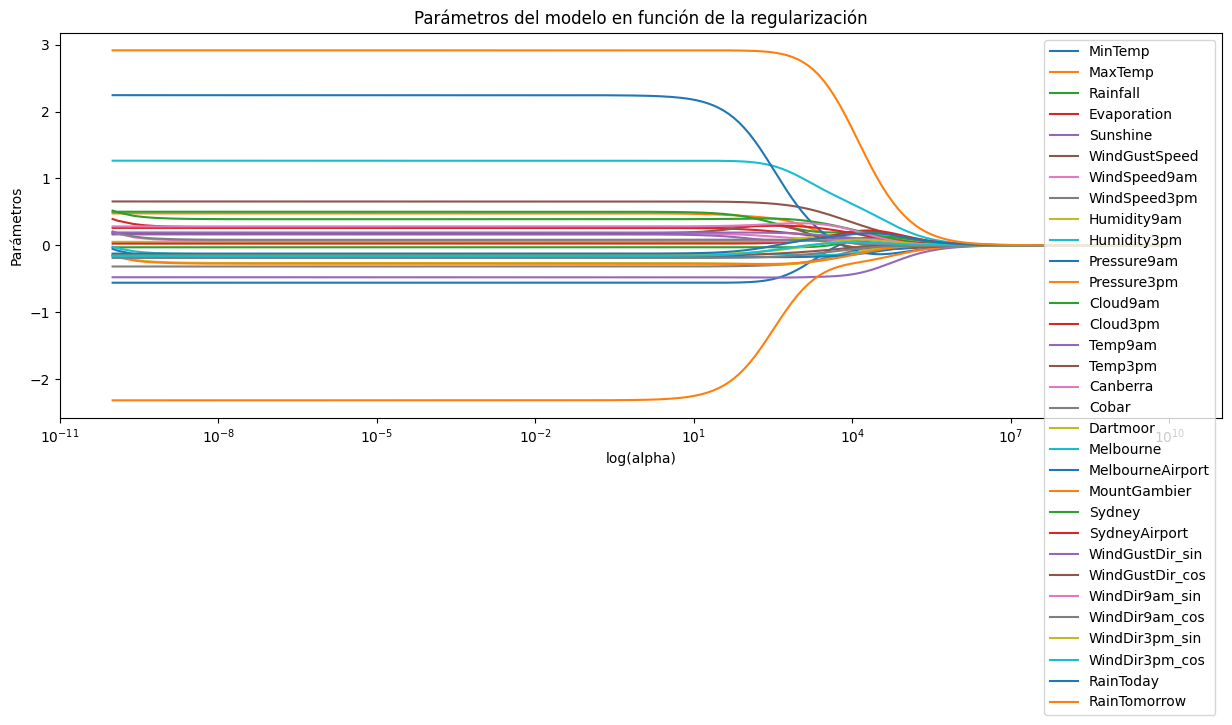

In [88]:
alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()


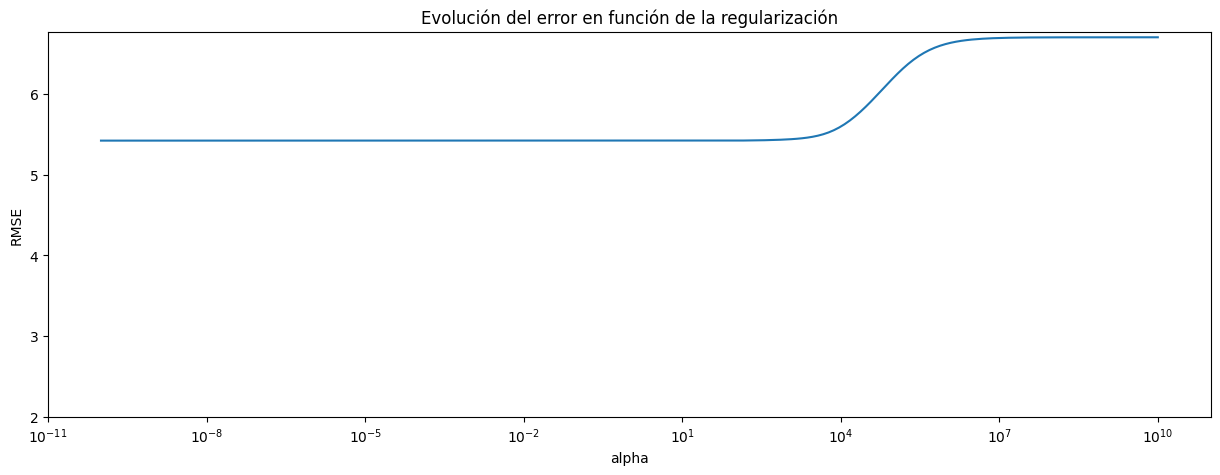

In [89]:
mod = modelo.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [90]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 22.73965752357932


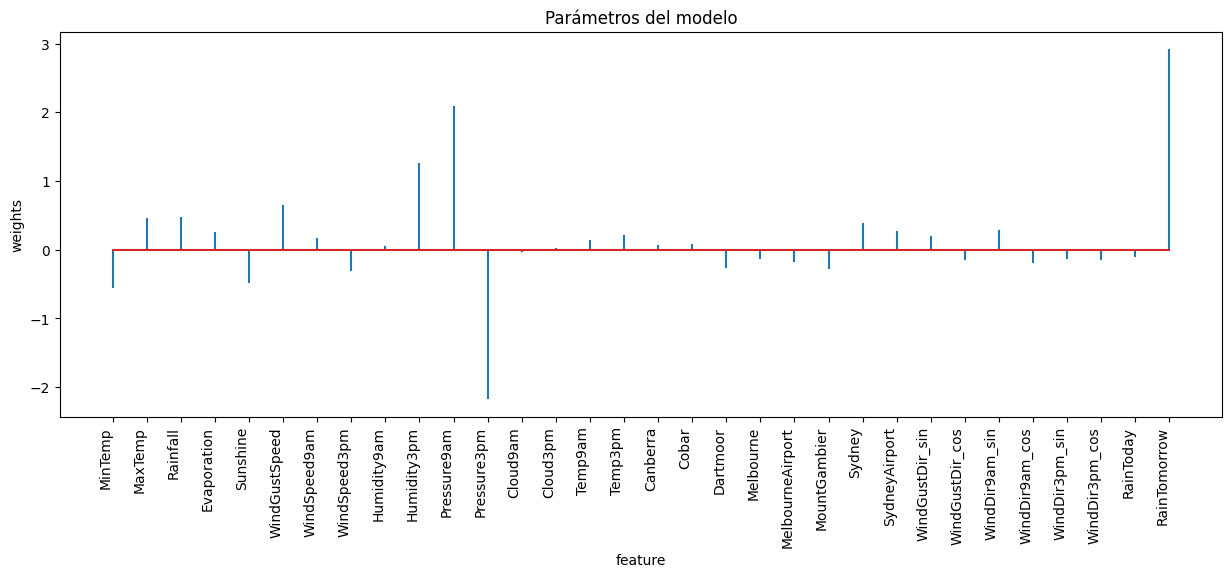

In [94]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [95]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [96]:
# Error de test del modelo

rmse_ridge = mean_squared_error(y_test,
                y_pred,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_ridge}")
R2 = metrics.r2_score(y_test, y_pred)
print(f"El error (R) de test es: {R2}")

El error (rmse) de test es: 4.942271756110505
El error (R) de test es: 0.33964524471066593


## Elastic Net

In [97]:
model_elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)

In [98]:
model_elastic.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [99]:
y_pred_elastic = model_elastic.predict(X_test)

In [100]:
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

In [101]:
print("----------")
print('Resultados con Regularización (Elastic Net):')
print(f'Error cuadrático medio (MSE): {mse_elastic:.2f}')
print(f'Coeficiente de determinación (R^2): {r2_elastic:.2f}')

----------
Resultados con Regularización (Elastic Net):
Error cuadrático medio (MSE): 24.37
Coeficiente de determinación (R^2): 0.34


# Validación cruzada

# Balance de datos
La razón por la cual es importante verificar el data set es porque en caso de que tenga mas registros de mi variable a predecir con un cierto valor que de otro, mi modelo puede llegar a tener sesgo a la hora de predecir incorrectamente aquellos valores que no eran mayoría en mi data set

Text(0, 0.5, 'Cantidad')

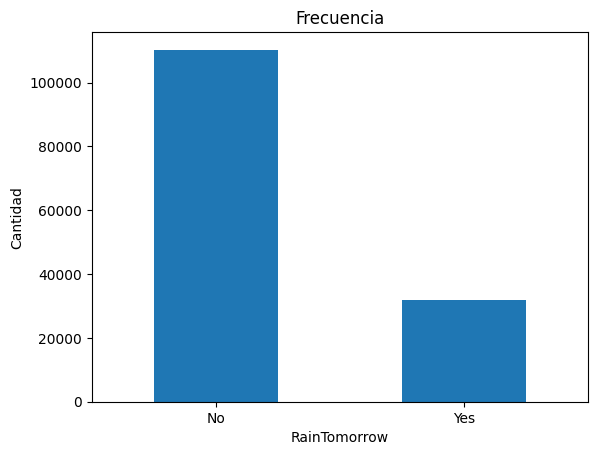

In [512]:
### Balance de datos:
rain_classes = pd.value_counts(df['RainTomorrow'], sort = True)
rain_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia")
plt.xlabel("RainTomorrow")
plt.ylabel("Cantidad")


In [518]:
columns_to_exclude = ['Location', 'RainToday', 'RainTomorrow', 'RainfallTomorrow']
min_max_scaler = MinMaxScaler()
l_values = df_clean[[col for col in df_clean.columns if col not in columns_to_exclude]]
scaled_values = min_max_scaler.fit(l_values)

# Crear un nuevo DataFrame estandarizado con los nombres de las columnas originales
df_std = pd.DataFrame(X_scaled, columns=df_sub.columns)

# Mantenemos las columnas excluídas del estandarizado
# df_std['Location'] = df['Location']
df_std['RainToday'] = df_drop['RainToday']
df_std['RainTomorrow'] = df_drop['RainTomorrow']
df_std['RainfallTomorrow'] = df_drop['RainfallTomorrow']
df_std


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,loc_Cobar,loc_Dartmoor,loc_Melbourne,loc_MelbourneAirport,loc_MountGambier,loc_Sydney,loc_SydneyAirport,RainToday,RainTomorrow,RainfallTomorrow
0,1.177715,2.018170,-0.320238,2.200385,1.605642e+00,0.231640,0.403333,-0.880812,0.460265,-1.020217e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1.264067,1.069603,-0.320238,3.050138,1.811428e+00,0.019047,-0.389839,-0.109883,-0.199031,3.530202e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,0.763224,1.852547,-0.320238,2.382474,1.899622e+00,-0.406138,-0.894584,-1.073544,-1.737387,1.876430e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,1.436772,2.379529,-0.320238,1.836205,1.105876e+00,-1.469102,0.259120,-1.266276,1.559090,1.514990e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1.868533,2.499982,-0.320238,2.018295,1.576244e+00,1.082010,-0.822478,1.046509,0.680030,-1.020217e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23970,-0.842927,-0.827533,-0.320238,0.000000,-2.611069e-16,-1.681694,-0.101413,-1.459008,1.339325,8.811884e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
23971,-0.411166,-1.294289,-0.016558,0.000000,-2.611069e-16,0.019047,-1.615649,-1.459008,-0.418796,-1.654019e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
23972,-0.704764,-0.917873,-0.320238,0.000000,-2.611069e-16,-1.681694,-0.822478,-1.459008,1.559090,-2.807816e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
23973,-0.981091,-0.842590,-0.320238,0.000000,-2.611069e-16,-1.681694,-0.389839,1.431974,0.899795,8.811884e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [514]:
# División de los datos en train y test

X = df_std.drop(columns='RainfallTomorrow')
y = df_std['RainfallTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2,random_state = 42)

X_train=pd.DataFrame(X_train,columns=df_std.drop(columns='RainfallTomorrow').columns)
X_test=pd.DataFrame(X_test,columns=df_std.drop(columns='RainfallTomorrow').columns)

data_train=pd.concat([X_train,pd.DataFrame(y_train,columns=['RainfallTomorrow'])],axis=1)

KeyError: "['RainfallTomorrow'] not found in axis"

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train